<a href="https://colab.research.google.com/github/affrriiiid/Nexus/blob/main/Iris_classification_using_K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


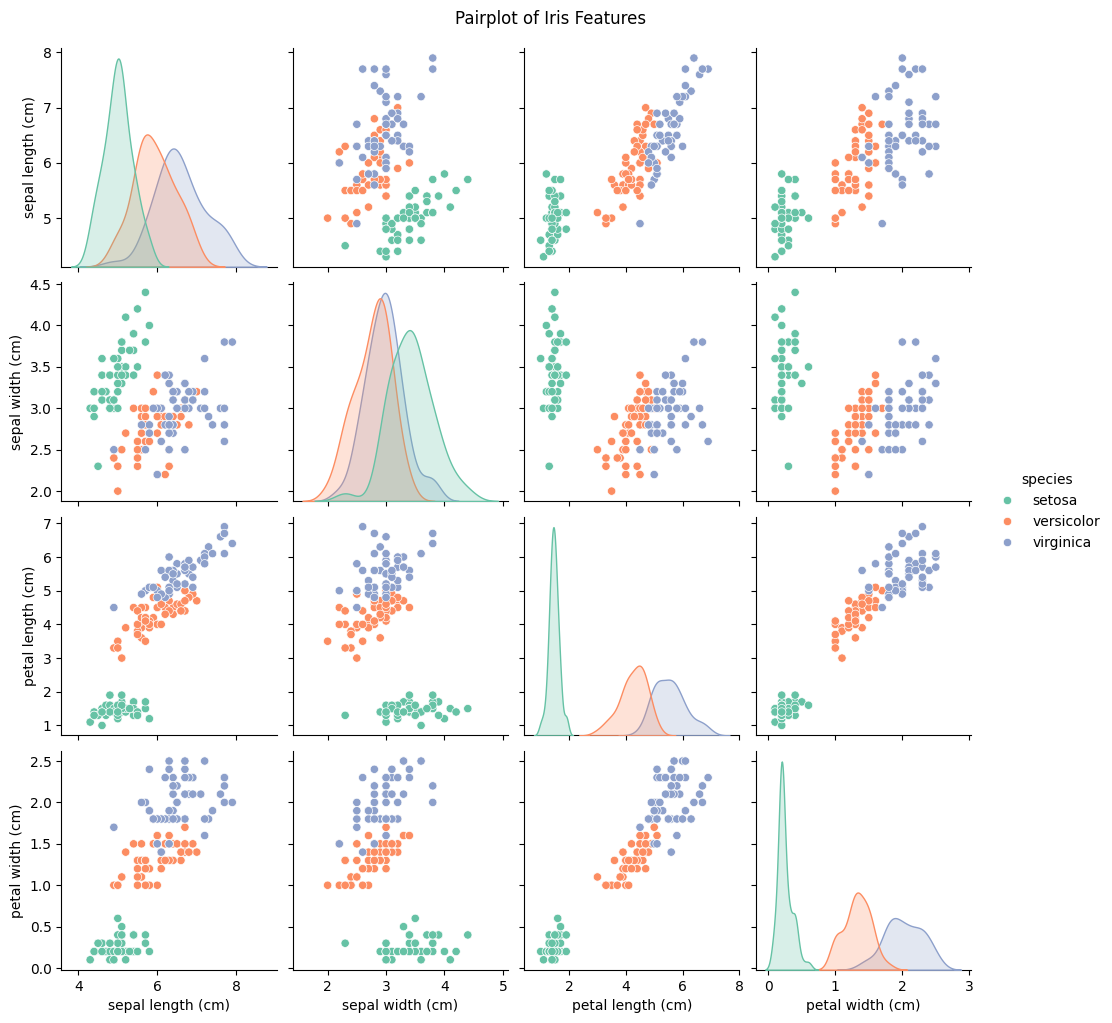

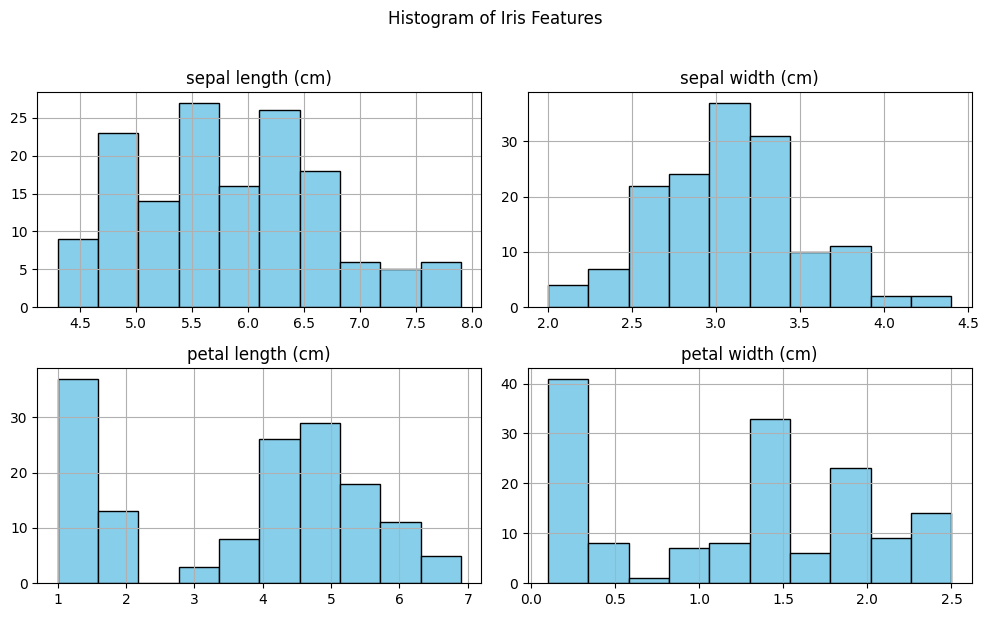


✅ Accuracy Score: 1.00


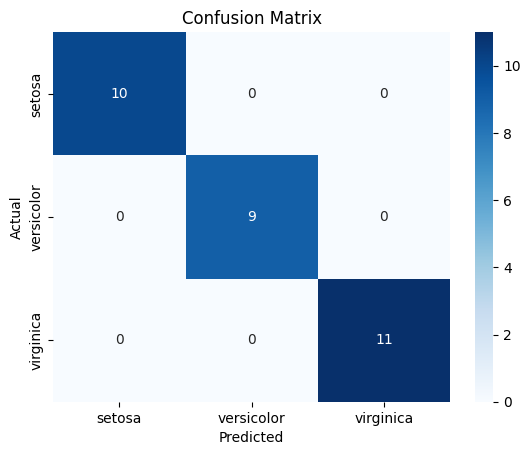

In [1]:
# 1. 📦 Import required libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. 📥 Load the Iris dataset and convert to DataFrame
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# 3. 🔍 Explore the data

# Display first 5 rows
print("First 5 rows of the dataset:")
print(df.head())

# Pairplot to visualize relationships between features
sns.pairplot(df, hue="species", palette="Set2")
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

# Alternatively, histogram of each feature
df.hist(figsize=(10, 6), color="skyblue", edgecolor="black")
plt.suptitle("Histogram of Iris Features", y=1.02)
plt.tight_layout()
plt.show()

# 4. ✂️ Split data into training and testing sets
X = iris.data  # Features
y = iris.target  # Target (species)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. 📚 Apply the K-Nearest Neighbors algorithm
knn = KNeighborsClassifier(n_neighbors=3)

# 6. 🧠 Train the model and predict test data
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# 7. 📈 Evaluate the model
# Accuracy Score
acc = accuracy_score(y_test, y_pred)
print(f"\n✅ Accuracy Score: {acc:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
species_names = iris.target_names

# Visualize confusion matrix with seaborn heatmap
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d",
            xticklabels=species_names,
            yticklabels=species_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()